## Randomized Clique Finding Algorithm
Iplementation of a randomized clique finding algorithm

G = (V,E)<br>
choose random v1,v2,v3<br>
check {{v1,v2},{v2,v3},{v1,v3}} e E?<br>
return **true** if yes, **false** if no.<br>

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import time
import pandas as pd
import warnings
import itertools
import scipy.special
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
#this function checks if node sample forms a clique in a greaph and returns true if yes, false if not
def clique_tester(G, test_nodes):
    for node_a in test_nodes:
        for node_b in test_nodes:
            if node_a != node_b:
                if (((node_a,node_b) in G.edges) or ((node_b,node_a) in G.edges)):
                    continue
                else:
                    return False
    return True

### Random Algorithm

In [4]:
#this function finds a n-clique in a Graph by picking random samples from nodes and returns found cliques as list of edges
def random_clique_finder(G,clique_size):
    for i in range(len(G.nodes)**clique_size):
        random_nodes = random.sample(list(G.nodes), k = clique_size)
        if(clique_tester(G,random_nodes)):
            return True
    return False

### Brute Force Algorithm

In [5]:
#this function finds a n-clique in a Graph by testing all posible edge combinations and returns found cliques as list of edges
def conventional_clique_finder(G, clique_size):
    combinations = itertools.combinations(G.nodes(),clique_size)
    for combination in combinations:
        if clique_tester(G, combination):
            return True
    return False  

### Analysis

In [6]:
def visualize_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

In [7]:
#Method tests both algorithms and returns execution times and problem sizes
def test(G: nx.Graph, clique_size):
    visualize_graph(G)
    start_time = time.time()
    rd_clique_test = random_clique_finder(G, clique_size)
    stop_time = time.time()
    rd_execution_time = stop_time-start_time
    p_error = (1-(1/scipy.special.binom(len(G.nodes),clique_size)))**(len(G.nodes)**clique_size)
    if(rd_clique_test):
        print("A clique could be located with the randomized algorithm in " + str(rd_execution_time) + " seconds")
        print("     Error probability assuming exactly one clique of " + str(clique_size) +" exists in graph: " +  str(p_error))
    else:
        print("No clique could be located with the randomized algorithm the execution time was " + str(rd_execution_time) + " seconds;")
        
    start_time = time.time()
    cv_clique_test = conventional_clique_finder(G, clique_size)
    stop_time = time.time()
    cv_execution_time = stop_time-start_time
    if(rd_clique_test):
        print("A clique could be located with the conventional algorithm in " + str(cv_execution_time) + " seconds")
    else:
        print("No clique could be located with the conventional algorithm the execution time was " + str(cv_execution_time) + " seconds;")
        
    return (len(G.nodes),len(G.edges),clique_size,rd_execution_time,p_error,rd_clique_test,cv_execution_time,cv_clique_test)
    

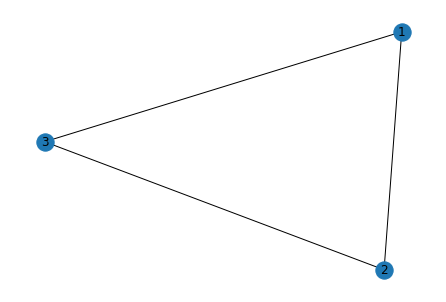

A clique could be located with the randomized algorithm in 6.079673767089844e-05 seconds
     Error probability assuming exactly one clique of 3 exists in graph: 0.0
A clique could be located with the conventional algorithm in 2.1457672119140625e-05 seconds


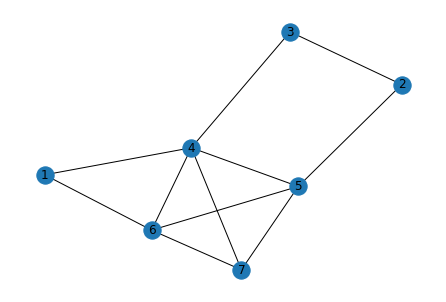

A clique could be located with the randomized algorithm in 0.00020813941955566406 seconds
     Error probability assuming exactly one clique of 3 exists in graph: 4.807611145703692e-05
A clique could be located with the conventional algorithm in 0.0001621246337890625 seconds


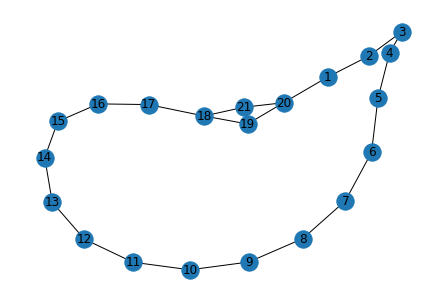

A clique could be located with the randomized algorithm in 0.0005109310150146484 seconds
     Error probability assuming exactly one clique of 3 exists in graph: 0.0009436295108688529
A clique could be located with the conventional algorithm in 0.005860567092895508 seconds


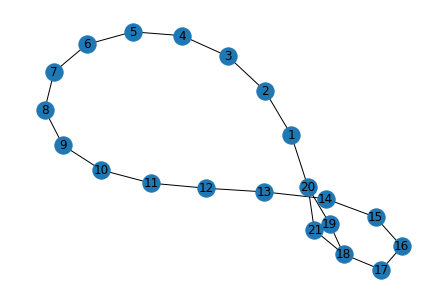

No clique could be located with the randomized algorithm the execution time was 1.2813808917999268 seconds;
No clique could be located with the conventional algorithm the execution time was 0.013338565826416016 seconds;


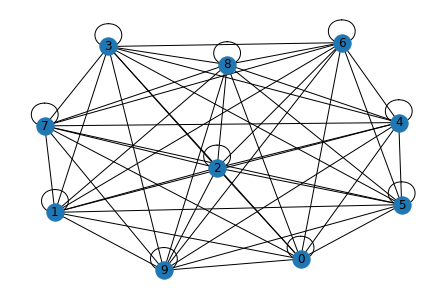

A clique could be located with the randomized algorithm in 8.058547973632812e-05 seconds
     Error probability assuming exactly one clique of 4 exists in graph: 1.8617174581785418e-21
A clique could be located with the conventional algorithm in 3.6716461181640625e-05 seconds


In [8]:
# Testen der Funktion
CLIQUE_SIZE = 3
RESULTS = []
G = nx.Graph([(1,2),(1,3),(2,3)])
RESULTS.append(test(G,CLIQUE_SIZE))
G = nx.Graph([(2, 3), (2, 5), (3, 4), (1, 4), (4, 6), (4, 5), (5, 7), (7, 6), (6,1),(5,6),(4,7)])
RESULTS.append(test(G,CLIQUE_SIZE))
G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,13),(13,14),(14,15),(15,16),(16,17),(17,18),(18,19),(19,20),(20,1),(20,21),(19,21),(18,21)])
RESULTS.append(test(G,CLIQUE_SIZE))
CLIQUE_SIZE = 4
RESULTS.append(test(G,CLIQUE_SIZE))
G = nx.Graph([(a,b) for a in range(10) for b in range(10)])
RESULTS.append(test(G,CLIQUE_SIZE))

In [9]:
output = pd.DataFrame(data=RESULTS,columns = ["|N|", "|E|","Clique Size","Execution Time Randomized Algorithm", "Error Probability", " Random Found", "Execution Time Conventional Algorithm", "Conventional Found"])
output

,|N|,|E|,Clique Size,Execution Time Randomized Algorithm,Error Probability,Random Found,Execution Time Conventional Algorithm,Conventional Found
0,3,3,3,0.000061,0.000000e+00,True,0.000021,True
1,7,11,3,0.000208,4.807611e-05,True,0.000162,True
2,21,23,3,0.000511,9.436295e-04,True,0.005861,True
3,21,23,4,1.281381,7.700803e-15,False,0.013339,False
4,10,55,4,0.000081,1.861717e-21,True,0.000037,True
